In [4]:
import os
import cv2
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.utils import to_categorical

# folder_path = "/Dataset/image_data_fin"
folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')

# Create a list to store the combined images and their labels
combined_images = []
labels = []

# Define the regex pattern to match the labels
pattern = r"(?:bed|fall|pickup|run|sitdown|standup|walk)"

# Iterate over the files in the folder
for filename in os.listdir(folder_path):
    if filename.startswith("antenna1_input_") and filename.endswith(".png"):
        experiment_name = filename.split("_")[3]  # Extract the experiment name from the filename

        # Load and normalize the three images
        img1_path = os.path.join(folder_path, filename)
        img2_path = os.path.join(folder_path, filename.replace("antenna1", "antenna2"))
        img3_path = os.path.join(folder_path, filename.replace("antenna1", "antenna3"))

        img1 = cv2.imread(img1_path, 0) / 255.0
        img2 = cv2.imread(img2_path, 0) / 255.0
        img3 = cv2.imread(img3_path, 0) / 255.0

        # Merge the images into a three-channel image
        merged_img = cv2.merge([img1, img2, img3])

        # Extract the label from the filename using regex
        match = re.search(pattern, filename)
        if match:
            label = match.group()  # Retrieve the matched label
        else:
            label = "unknown"  # If no label is found, use "unknown" as the label

        # Append the combined image and its label to the lists
        combined_images.append(merged_img)
        labels.append(label)

# Convert the lists to numpy arrays
combined_images = np.array(combined_images)
labels = np.array(labels)

# Convert the labels to one-hot encoded format
label_dict = {'bed': 0, 'fall': 1, 'pickup': 2, 'run': 3, 'sitdown': 4, 'standup': 5, 'walk': 6}
labels_encoded = np.array([label_dict[label] for label in labels])
labels_one_hot = to_categorical(labels_encoded)

# Split the dataset into training and testing sets
combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)

# Define the modified CNN architecture
num_classes = 7
num_epochs = 50
batch_size = 32

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=combined_images[0].shape))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

# Compile the model
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(combined_images, labels_one_hot, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(combined_images_test, labels_test)
print('Test accuracy:', test_acc)


Epoch 1/50
14/14 [==============================] - 45s 3s/step - loss: 2.3810 - accuracy: 0.2539 - val_loss: 2.9529 - val_accuracy: 0.0000e+00
Epoch 2/50
14/14 [==============================] - 42s 3s/step - loss: 1.1763 - accuracy: 0.5730 - val_loss: 3.7063 - val_accuracy: 0.0268
Epoch 3/50
14/14 [==============================] - 37s 3s/step - loss: 0.6851 - accuracy: 0.7820 - val_loss: 5.3483 - val_accuracy: 0.1607
Epoch 4/50
14/14 [==============================] - 35s 3s/step - loss: 0.4102 - accuracy: 0.8787 - val_loss: 4.3628 - val_accuracy: 0.2321
Epoch 5/50
14/14 [==============================] - 37s 3s/step - loss: 0.2345 - accuracy: 0.9191 - val_loss: 6.2998 - val_accuracy: 0.2768
Epoch 6/50
14/14 [==============================] - 42s 3s/step - loss: 0.1318 - accuracy: 0.9528 - val_loss: 6.0904 - val_accuracy: 0.1250
Epoch 7/50
14/14 [==============================] - 39s 3s/step - loss: 0.0496 - accuracy: 0.9865 - val_loss: 8.8372 - val_accuracy: 0.2411
Epoch 8/50
14/14

In [3]:
#over fitting? 

#plot accuracy and loss

#In this modified code, Ive added BatchNormalization and Dropout layers in  model and 
#implemented early stopping. Also, the model.fit() function has been updated to use the 
#train dataset for training and the test dataset for validation. You may want to split your data into train, 
#validation, and test sets for more accurate model assessment.


#The EarlyStopping callback is used to stop training when the validation loss 
#has not improved for 3 epochs. This number is set as patience=3, but you may adjust it as necessary.

#As result a bit less oveerfit



In [1]:
import os
import cv2
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.utils import to_categorical

# folder_path = "/Dataset/image_data_fin"
folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')

# Create a list to store the combined images and their labels
combined_images = []
labels = []

# Define the regex pattern to match the labels
pattern = r"(?:bed|fall|pickup|run|sitdown|standup|walk)"

# Iterate over the files in the folder
for filename in os.listdir(folder_path):
    if filename.startswith("antenna1_input_") and filename.endswith(".png"):
        experiment_name = filename.split("_")[3]  # Extract the experiment name from the filename

        # Load and normalize the three images
        img1_path = os.path.join(folder_path, filename)
        img2_path = os.path.join(folder_path, filename.replace("antenna1", "antenna2"))
        img3_path = os.path.join(folder_path, filename.replace("antenna1", "antenna3"))

        img1 = cv2.imread(img1_path, 0) / 255.0
        img2 = cv2.imread(img2_path, 0) / 255.0
        img3 = cv2.imread(img3_path, 0) / 255.0

        # Merge the images into a three-channel image
        merged_img = cv2.merge([img1, img2, img3])

        # Extract the label from the filename using regex
        match = re.search(pattern, filename)
        if match:
            label = match.group()  # Retrieve the matched label
        else:
            label = "unknown"  # If no label is found, use "unknown" as the label

        # Append the combined image and its label to the lists
        combined_images.append(merged_img)
        labels.append(label)

# Convert the lists to numpy arrays
combined_images = np.array(combined_images)
labels = np.array(labels)

# Convert the labels to one-hot encoded format
label_dict = {'bed': 0, 'fall': 1, 'pickup': 2, 'run': 3, 'sitdown': 4, 'standup': 5, 'walk': 6}
labels_encoded = np.array([label_dict[label] for label in labels])
labels_one_hot = to_categorical(labels_encoded)

# Split the dataset into training and testing sets
combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)

# Define the modified CNN architecture
num_classes = 7
num_epochs = 50
batch_size = 32

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=combined_images[0].shape))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

# Compile the model
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(combined_images, labels_one_hot, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(combined_images_test, labels_test)
print('Test accuracy:', test_acc)


Epoch 1/50
14/14 [==============================] - 51s 3s/step - loss: 7.2670 - accuracy: 0.1820 - val_loss: 2.7005 - val_accuracy: 0.0000e+00
Epoch 2/50
14/14 [==============================] - 42s 3s/step - loss: 1.8281 - accuracy: 0.2944 - val_loss: 2.0745 - val_accuracy: 0.0000e+00
Epoch 3/50
14/14 [==============================] - 40s 3s/step - loss: 1.4799 - accuracy: 0.4899 - val_loss: 1.9736 - val_accuracy: 0.0179
Epoch 4/50
14/14 [==============================] - 37s 3s/step - loss: 1.0723 - accuracy: 0.6292 - val_loss: 3.2786 - val_accuracy: 0.0000e+00
Epoch 5/50
14/14 [==============================] - 36s 3s/step - loss: 0.7510 - accuracy: 0.7640 - val_loss: 3.1251 - val_accuracy: 0.2143
Epoch 6/50
14/14 [==============================] - 36s 3s/step - loss: 0.6313 - accuracy: 0.7798 - val_loss: 2.9106 - val_accuracy: 0.3304
Epoch 7/50
14/14 [==============================] - 36s 3s/step - loss: 0.5743 - accuracy: 0.8360 - val_loss: 4.1716 - val_accuracy: 0.2679
Epoch 8/

Epoch 1/50
14/14 [==============================] - 41s 3s/step - loss: 2.9558 - accuracy: 0.1933 - val_loss: 2.8143 - val_accuracy: 0.0000e+00
Epoch 2/50
14/14 [==============================] - 35s 2s/step - loss: 1.5742 - accuracy: 0.4292 - val_loss: 4.1499 - val_accuracy: 0.0000e+00
Epoch 3/50
14/14 [==============================] - 35s 2s/step - loss: 1.1225 - accuracy: 0.6000 - val_loss: 7.6683 - val_accuracy: 0.0000e+00
Epoch 4/50
14/14 [==============================] - 34s 2s/step - loss: 0.7351 - accuracy: 0.7685 - val_loss: 7.4010 - val_accuracy: 0.0893
Epoch 5/50
14/14 [==============================] - 34s 2s/step - loss: 0.4847 - accuracy: 0.8472 - val_loss: 6.7094 - val_accuracy: 0.1071
Epoch 6/50
14/14 [==============================] - 36s 3s/step - loss: 0.3129 - accuracy: 0.8921 - val_loss: 6.8833 - val_accuracy: 0.0804
Epoch 7/50
14/14 [==============================] - 36s 3s/step - loss: 0.3025 - accuracy: 0.9011 - val_loss: 10.9805 - val_accuracy: 0.0804
Epoch 8

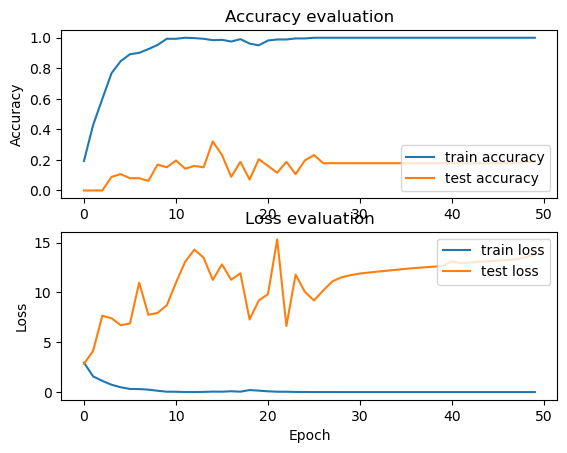

In [1]:
import os
import cv2
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.utils import to_categorical
import matplotlib.pyplot as plt

folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')

combined_images = []
labels = []

pattern = r"(?:bed|fall|pickup|run|sitdown|standup|walk)"

for filename in os.listdir(folder_path):
    if filename.startswith("antenna1_input_") and filename.endswith(".png"):
        experiment_name = filename.split("_")[3]

        img1_path = os.path.join(folder_path, filename)
        img2_path = os.path.join(folder_path, filename.replace("antenna1", "antenna2"))
        img3_path = os.path.join(folder_path, filename.replace("antenna1", "antenna3"))

        img1 = cv2.imread(img1_path, 0) / 255.0
        img2 = cv2.imread(img2_path, 0) / 255.0
        img3 = cv2.imread(img3_path, 0) / 255.0

        merged_img = cv2.merge([img1, img2, img3])

        match = re.search(pattern, filename)
        if match:
            label = match.group()
        else:
            label = "unknown"

        combined_images.append(merged_img)
        labels.append(label)

combined_images = np.array(combined_images)
labels = np.array(labels)

label_dict = {'bed': 0, 'fall': 1, 'pickup': 2, 'run': 3, 'sitdown': 4, 'standup': 5, 'walk': 6}
labels_encoded = np.array([label_dict[label] for label in labels])
labels_one_hot = to_categorical(labels_encoded)

combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)

num_classes = 7
num_epochs = 50
batch_size = 32

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=combined_images[0].shape))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(combined_images, labels_one_hot, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

test_loss, test_acc = model.evaluate(combined_images_test, labels_test)
print('Test accuracy:', test_acc)

# Create plots for training and validation accuracy and loss
fig, axs = plt.subplots(2)

# Create accuracy subplot
axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy evaluation")

# Create loss subplot
axs[1].plot(history.history["loss"], label="train loss")
axs[1].plot(history.history["val_loss"], label="test loss")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend(loc="upper right")
axs[1].set_title("Loss evaluation")

plt.show()


Epoch 1/50
14/14 [==============================] - 39s 3s/step - loss: 3.1785 - accuracy: 0.2337 - val_loss: 1.8627 - val_accuracy: 0.1875
Epoch 2/50
14/14 [==============================] - 34s 2s/step - loss: 1.4805 - accuracy: 0.4809 - val_loss: 1.4548 - val_accuracy: 0.5000
Epoch 3/50
14/14 [==============================] - 33s 2s/step - loss: 1.0447 - accuracy: 0.6449 - val_loss: 1.0788 - val_accuracy: 0.6339
Epoch 4/50
14/14 [==============================] - 33s 2s/step - loss: 0.6540 - accuracy: 0.7910 - val_loss: 0.9866 - val_accuracy: 0.6429
Epoch 5/50
14/14 [==============================] - 33s 2s/step - loss: 0.4334 - accuracy: 0.8607 - val_loss: 0.9092 - val_accuracy: 0.6875
Epoch 6/50
14/14 [==============================] - 33s 2s/step - loss: 0.2568 - accuracy: 0.9213 - val_loss: 0.8199 - val_accuracy: 0.7411
Epoch 7/50
14/14 [==============================] - 34s 2s/step - loss: 0.1418 - accuracy: 0.9551 - val_loss: 1.0862 - val_accuracy: 0.7411
Epoch 8/50
14/14 [==

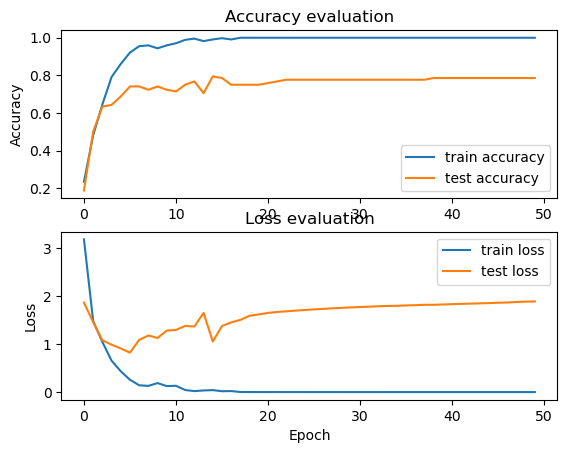

In [2]:
#with shuffle of the data#

import os
import cv2
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')

combined_images = []
labels = []

pattern = r"(?:bed|fall|pickup|run|sitdown|standup|walk)"

for filename in os.listdir(folder_path):
    if filename.startswith("antenna1_input_") and filename.endswith(".png"):
        experiment_name = filename.split("_")[3]

        img1_path = os.path.join(folder_path, filename)
        img2_path = os.path.join(folder_path, filename.replace("antenna1", "antenna2"))
        img3_path = os.path.join(folder_path, filename.replace("antenna1", "antenna3"))

        img1 = cv2.imread(img1_path, 0) / 255.0
        img2 = cv2.imread(img2_path, 0) / 255.0
        img3 = cv2.imread(img3_path, 0) / 255.0

        merged_img = cv2.merge([img1, img2, img3])

        match = re.search(pattern, filename)
        if match:
            label = match.group()
        else:
            label = "unknown"

        combined_images.append(merged_img)
        labels.append(label)

combined_images = np.array(combined_images)
labels = np.array(labels)

label_dict = {'bed': 0, 'fall': 1, 'pickup': 2, 'run': 3, 'sitdown': 4, 'standup': 5, 'walk': 6}
labels_encoded = np.array([label_dict[label] for label in labels])
labels_one_hot = to_categorical(labels_encoded)

# Shuffle your data before splitting
combined_images, labels_one_hot = shuffle(combined_images, labels_one_hot, random_state=42)

combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)

num_classes = 7
num_epochs = 50
batch_size = 32

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=combined_images[0].shape))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size, validation_data=(combined_images_test, labels_test))

test_loss, test_acc = model.evaluate(combined_images_test, labels_test)
print('Test accuracy:', test_acc)

# Create plots for training and validation accuracy and loss
fig, axs = plt.subplots(2)

# Create accuracy subplot
axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy evaluation")

# Create loss subplot
axs[1].plot(history.history["loss"], label="train loss")
axs[1].plot(history.history["val_loss"], label="test loss")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend(loc="upper right")
axs[1].set_title("Loss evaluation")

plt.show()


Epoch 1/50
14/14 [==============================] - 35s 2s/step - loss: 2.5878 - accuracy: 0.1596 - val_loss: 1.8769 - val_accuracy: 0.3571
Epoch 2/50
14/14 [==============================] - 31s 2s/step - loss: 1.7027 - accuracy: 0.3596 - val_loss: 1.4808 - val_accuracy: 0.5000
Epoch 3/50
14/14 [==============================] - 30s 2s/step - loss: 1.1438 - accuracy: 0.6247 - val_loss: 1.3674 - val_accuracy: 0.5446
Epoch 4/50
14/14 [==============================] - 30s 2s/step - loss: 0.7961 - accuracy: 0.7551 - val_loss: 1.6364 - val_accuracy: 0.5357
Epoch 5/50
14/14 [==============================] - 31s 2s/step - loss: 0.6525 - accuracy: 0.7865 - val_loss: 1.0951 - val_accuracy: 0.6875
Epoch 6/50
14/14 [==============================] - 30s 2s/step - loss: 0.4599 - accuracy: 0.8607 - val_loss: 1.0569 - val_accuracy: 0.6696
Epoch 7/50
14/14 [==============================] - 31s 2s/step - loss: 0.3496 - accuracy: 0.8921 - val_loss: 1.0883 - val_accuracy: 0.7054
Epoch 8/50
14/14 [==

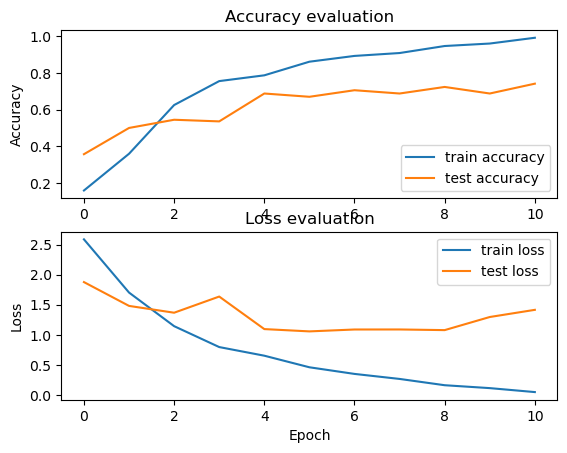

In [3]:
#more simple mode to try decrease overfitting

import os
import cv2
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')

combined_images = []
labels = []

pattern = r"(?:bed|fall|pickup|run|sitdown|standup|walk)"

for filename in os.listdir(folder_path):
    if filename.startswith("antenna1_input_") and filename.endswith(".png"):
        experiment_name = filename.split("_")[3]

        img1_path = os.path.join(folder_path, filename)
        img2_path = os.path.join(folder_path, filename.replace("antenna1", "antenna2"))
        img3_path = os.path.join(folder_path, filename.replace("antenna1", "antenna3"))

        img1 = cv2.imread(img1_path, 0) / 255.0
        img2 = cv2.imread(img2_path, 0) / 255.0
        img3 = cv2.imread(img3_path, 0) / 255.0

        merged_img = cv2.merge([img1, img2, img3])

        match = re.search(pattern, filename)
        if match:
            label = match.group()
        else:
            label = "unknown"

        combined_images.append(merged_img)
        labels.append(label)

combined_images = np.array(combined_images)
labels = np.array(labels)

label_dict = {'bed': 0, 'fall': 1, 'pickup': 2, 'run': 3, 'sitdown': 4, 'standup': 5, 'walk': 6}
labels_encoded = np.array([label_dict[label] for label in labels])
labels_one_hot = to_categorical(labels_encoded)

# Shuffle your data before splitting
combined_images, labels_one_hot = shuffle(combined_images, labels_one_hot, random_state=42)

combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)

num_classes = 7
num_epochs = 50
batch_size = 32

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=combined_images[0].shape))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))  # Reduced number of filters
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))  # Added dropout layer
model.add(keras.layers.Dense(32, activation='relu'))  # Reduced number of neurons
model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(combined_images_test, labels_test), callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(combined_images_test, labels_test)
print('Test accuracy:', test_acc)

# Create plots for training and validation accuracy and loss
fig, axs = plt.subplots(2)

# Create accuracy subplot
axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy evaluation")

# Create loss subplot
axs[1].plot(history.history["loss"], label="train loss")
axs[1].plot(history.history["val_loss"], label="test loss")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend(loc="upper right")
axs[1].set_title("Loss evaluation")

plt.show()


Epoch 1/50
14/14 [==============================] - 40s 3s/step - loss: 2.0232 - accuracy: 0.2180 - val_loss: 1.8361 - val_accuracy: 0.2946
Epoch 2/50
14/14 [==============================] - 35s 3s/step - loss: 1.4895 - accuracy: 0.4854 - val_loss: 1.5381 - val_accuracy: 0.3661
Epoch 3/50
14/14 [==============================] - 34s 2s/step - loss: 1.0178 - accuracy: 0.6427 - val_loss: 1.2599 - val_accuracy: 0.5804
Epoch 4/50
14/14 [==============================] - 39s 3s/step - loss: 0.7465 - accuracy: 0.7775 - val_loss: 1.6798 - val_accuracy: 0.5804
Epoch 5/50
14/14 [==============================] - 36s 3s/step - loss: 0.6535 - accuracy: 0.8112 - val_loss: 1.1940 - val_accuracy: 0.6429
Epoch 6/50
14/14 [==============================] - 38s 3s/step - loss: 0.4493 - accuracy: 0.8404 - val_loss: 1.1727 - val_accuracy: 0.7232
Epoch 7/50
14/14 [==============================] - 36s 3s/step - loss: 0.3650 - accuracy: 0.9056 - val_loss: 1.0930 - val_accuracy: 0.6964
Epoch 8/50
14/14 [==

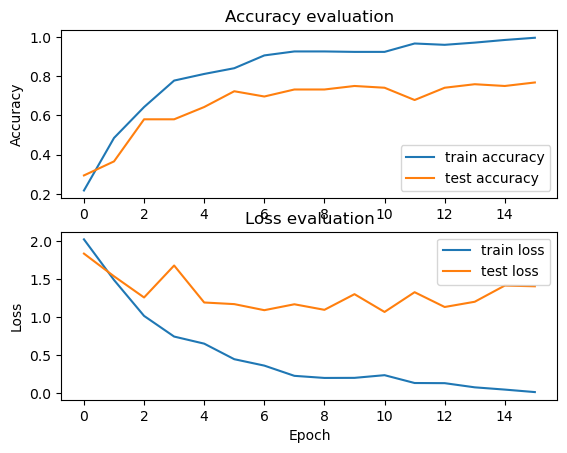

In [1]:
# updated code with a dropout rate of 0.6: 

import os
import cv2
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')

combined_images = []
labels = []

pattern = r"(?:bed|fall|pickup|run|sitdown|standup|walk)"

for filename in os.listdir(folder_path):
    if filename.startswith("antenna1_input_") and filename.endswith(".png"):
        experiment_name = filename.split("_")[3]

        img1_path = os.path.join(folder_path, filename)
        img2_path = os.path.join(folder_path, filename.replace("antenna1", "antenna2"))
        img3_path = os.path.join(folder_path, filename.replace("antenna1", "antenna3"))

        img1 = cv2.imread(img1_path, 0) / 255.0
        img2 = cv2.imread(img2_path, 0) / 255.0
        img3 = cv2.imread(img3_path, 0) / 255.0

        merged_img = cv2.merge([img1, img2, img3])

        match = re.search(pattern, filename)
        if match:
            label = match.group()
        else:
            label = "unknown"

        combined_images.append(merged_img)
        labels.append(label)

combined_images = np.array(combined_images)
labels = np.array(labels)

label_dict = {'bed': 0, 'fall': 1, 'pickup': 2, 'run': 3, 'sitdown': 4, 'standup': 5, 'walk': 6}
labels_encoded = np.array([label_dict[label] for label in labels])
labels_one_hot = to_categorical(labels_encoded)

# Shuffle your data before splitting
combined_images, labels_one_hot = shuffle(combined_images, labels_one_hot, random_state=42)

combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)

num_classes = 7
num_epochs = 50
batch_size = 32

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=combined_images[0].shape))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))  # Reduced number of filters
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.6))  # Increased dropout rate
model.add(keras.layers.Dense(32, activation='relu'))  # Reduced number of neurons
model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(combined_images_test, labels_test), callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(combined_images_test, labels_test)
print('Test accuracy:', test_acc)

# Create plots for training and validation accuracy and loss
fig, axs = plt.subplots(2)

# Create accuracy subplot
axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy evaluation")

# Create loss subplot
axs[1].plot(history.history["loss"], label="train loss")
axs[1].plot(history.history["val_loss"], label="test loss")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend(loc="upper right")
axs[1].set_title("Loss evaluation")

plt.show()


Epoch 1/50
14/14 [==============================] - 43s 3s/step - loss: 2.0573 - accuracy: 0.1348 - val_loss: 1.9001 - val_accuracy: 0.1518 - lr: 0.0010
Epoch 2/50
14/14 [==============================] - 37s 3s/step - loss: 1.8444 - accuracy: 0.2404 - val_loss: 1.8380 - val_accuracy: 0.2411 - lr: 0.0010
Epoch 3/50
14/14 [==============================] - 34s 2s/step - loss: 1.5531 - accuracy: 0.3730 - val_loss: 1.7257 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 4/50
14/14 [==============================] - 32s 2s/step - loss: 1.2929 - accuracy: 0.5663 - val_loss: 1.3408 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 5/50
14/14 [==============================] - 32s 2s/step - loss: 0.9612 - accuracy: 0.7056 - val_loss: 1.3105 - val_accuracy: 0.5893 - lr: 0.0010
Epoch 6/50
14/14 [==============================] - 35s 3s/step - loss: 0.8059 - accuracy: 0.7708 - val_loss: 1.1311 - val_accuracy: 0.6339 - lr: 0.0010
Epoch 7/50
14/14 [==============================] - 39s 3s/step - loss: 0.6343 - a

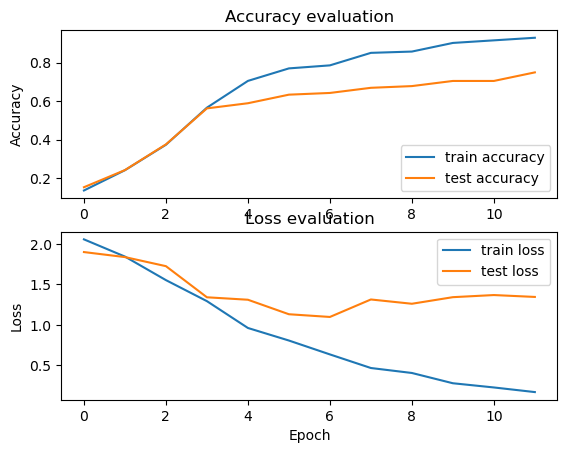

In [3]:
#LEts try add learning rate scheduling 

import os
import cv2
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')

combined_images = []
labels = []

pattern = r"(?:bed|fall|pickup|run|sitdown|standup|walk)"

for filename in os.listdir(folder_path):
    if filename.startswith("antenna1_input_") and filename.endswith(".png"):
        experiment_name = filename.split("_")[3]

        img1_path = os.path.join(folder_path, filename)
        img2_path = os.path.join(folder_path, filename.replace("antenna1", "antenna2"))
        img3_path = os.path.join(folder_path, filename.replace("antenna1", "antenna3"))

        img1 = cv2.imread(img1_path, 0) / 255.0
        img2 = cv2.imread(img2_path, 0) / 255.0
        img3 = cv2.imread(img3_path, 0) / 255.0

        merged_img = cv2.merge([img1, img2, img3])

        match = re.search(pattern, filename)
        if match:
            label = match.group()
        else:
            label = "unknown"

        combined_images.append(merged_img)
        labels.append(label)

combined_images = np.array(combined_images)
labels = np.array(labels)

label_dict = {'bed': 0, 'fall': 1, 'pickup': 2, 'run': 3, 'sitdown': 4, 'standup': 5, 'walk': 6}
labels_encoded = np.array([label_dict[label] for label in labels])
labels_one_hot = to_categorical(labels_encoded)

# Shuffle your data before splitting
combined_images, labels_one_hot = shuffle(combined_images, labels_one_hot, random_state=42)

combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)

num_classes = 7
num_epochs = 50
batch_size = 32

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=combined_images[0].shape))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))  # Reduced number of filters
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.6))  # Increased dropout rate
model.add(keras.layers.Dense(32, activation='relu'))  # Reduced number of neurons
model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Update model.fit() to include learning rate scheduler in the callbacks
history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(combined_images_test, labels_test), callbacks=[early_stopping, reduce_lr])

test_loss, test_acc = model.evaluate(combined_images_test, labels_test)
print('Test accuracy:', test_acc)

# Create plots for training and validation accuracy and loss
fig, axs = plt.subplots(2)

# Create accuracy subplot
axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy evaluation")

# Create loss subplot
axs[1].plot(history.history["loss"], label="train loss")
axs[1].plot(history.history["val_loss"], label="test loss")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend(loc="upper right")
axs[1].set_title("Loss evaluation")

plt.show()



# ResNet

94765736/94765736 [==============================] - 18s 0us/step
Epoch 1/50
14/14 [==============================] - 119s 8s/step - loss: 56.5862 - accuracy: 0.1438 - val_loss: 15.9119 - val_accuracy: 0.0714
Epoch 2/50
14/14 [==============================] - 103s 7s/step - loss: 9.8880 - accuracy: 0.1640 - val_loss: 1.9459 - val_accuracy: 0.1696
Epoch 3/50
14/14 [==============================] - 100s 7s/step - loss: 1.9723 - accuracy: 0.1393 - val_loss: 1.9468 - val_accuracy: 0.0714
Epoch 4/50
14/14 [==============================] - 112s 8s/step - loss: 1.9457 - accuracy: 0.1596 - val_loss: 1.9481 - val_accuracy: 0.0714
Epoch 5/50
14/14 [==============================] - 110s 8s/step - loss: 1.9461 - accuracy: 0.1640 - val_loss: 1.9489 - val_accuracy: 0.0714
Epoch 6/50
14/14 [==============================] - 111s 8s/step - loss: 1.9454 - accuracy: 0.1618 - val_loss: 1.9496 - val_accuracy: 0.0714
Epoch 7/50
4/4 [==============================] - 14s 3s/step - loss: 1.9518 - accurac

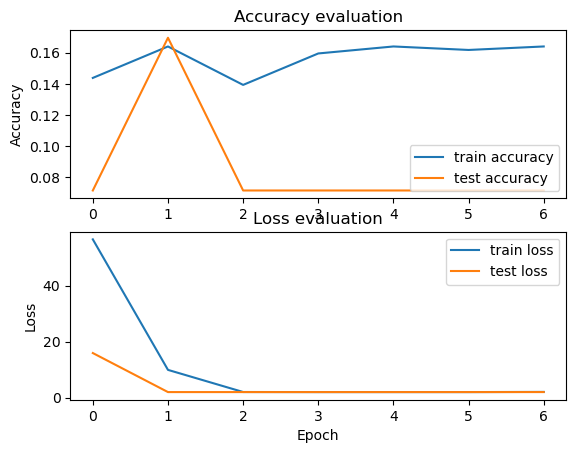

In [4]:
#using resnet model pretrained#

import os
import cv2
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')

combined_images = []
labels = []

pattern = r"(?:bed|fall|pickup|run|sitdown|standup|walk)"

for filename in os.listdir(folder_path):
    if filename.startswith("antenna1_input_") and filename.endswith(".png"):
        experiment_name = filename.split("_")[3]

        img1_path = os.path.join(folder_path, filename)
        img2_path = os.path.join(folder_path, filename.replace("antenna1", "antenna2"))
        img3_path = os.path.join(folder_path, filename.replace("antenna1", "antenna3"))

        img1 = cv2.imread(img1_path, 0) / 255.0
        img2 = cv2.imread(img2_path, 0) / 255.0
        img3 = cv2.imread(img3_path, 0) / 255.0

        merged_img = cv2.merge([img1, img2, img3])

        match = re.search(pattern, filename)
        if match:
            label = match.group()
        else:
            label = "unknown"

        combined_images.append(merged_img)
        labels.append(label)

combined_images = np.array(combined_images)
labels = np.array(labels)

label_dict = {'bed': 0, 'fall': 1, 'pickup': 2, 'run': 3, 'sitdown': 4, 'standup': 5, 'walk': 6}
labels_encoded = np.array([label_dict[label] for label in labels])
labels_one_hot = to_categorical(labels_encoded)

# Shuffle your data before splitting
combined_images, labels_one_hot = shuffle(combined_images, labels_one_hot, random_state=42)

combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)

num_classes = 7
num_epochs = 50
batch_size = 32

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=combined_images[0].shape)

# Add a new top layer
x = base_model.output
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(1024, activation='relu')(x) # dense layer 1
x = keras.layers.Dropout(0.5)(x) # to avoid overfitting
x = keras.layers.Dense(1024, activation='relu')(x) # dense layer 2
x = keras.layers.Dropout(0.5)(x) # to avoid overfitting
predictions = keras.layers.Dense(num_classes, activation='softmax')(x) # final layer with softmax activation

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(combined_images_test, labels_test), callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(combined_images_test, labels_test)
print('Test accuracy:', test_acc)

# Create plots for training and validation accuracy and loss
fig, axs = plt.subplots(2)

# Create accuracy subplot
axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy evaluation")

# Create loss subplot
axs[1].plot(history.history["loss"], label="train loss")
axs[1].plot(history.history["val_loss"], label="test loss")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend(loc="upper right")
axs[1].set_title("Loss evaluation")

plt.show()


Epoch 1/50
14/14 [==============================] - 9s 578ms/step - loss: 116.2514 - accuracy: 0.1708 - val_loss: 122.3721 - val_accuracy: 0.1607 - lr: 0.0010
Epoch 2/50
14/14 [==============================] - 7s 522ms/step - loss: 91.9900 - accuracy: 0.1573 - val_loss: 47.0559 - val_accuracy: 0.0714 - lr: 0.0010
Epoch 3/50
14/14 [==============================] - 7s 495ms/step - loss: 13.8263 - accuracy: 0.1618 - val_loss: 1.8972 - val_accuracy: 0.1071 - lr: 0.0010
Epoch 4/50
14/14 [==============================] - 7s 494ms/step - loss: 1.9180 - accuracy: 0.1685 - val_loss: 1.9477 - val_accuracy: 0.1161 - lr: 0.0010
Epoch 5/50
14/14 [==============================] - 7s 492ms/step - loss: 1.8505 - accuracy: 0.2315 - val_loss: 1.9249 - val_accuracy: 0.1339 - lr: 0.0010
Epoch 6/50
14/14 [==============================] - 7s 483ms/step - loss: 1.8116 - accuracy: 0.2404 - val_loss: 1.9249 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 7/50
14/14 [==============================] - 7s 491ms/st

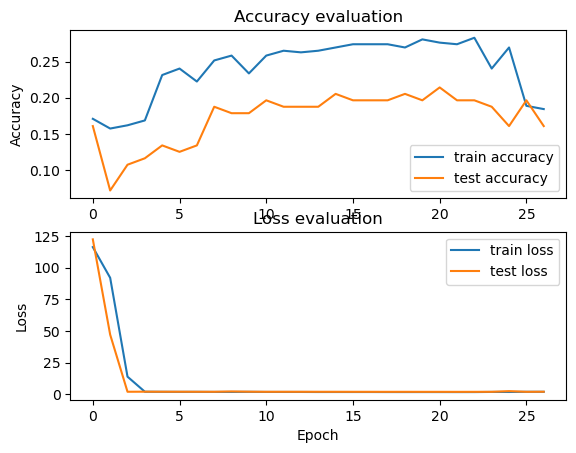

In [8]:
import os
import cv2
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')

combined_images = []
labels = []

pattern = r"(?:bed|fall|pickup|run|sitdown|standup|walk)"

for filename in os.listdir(folder_path):
    if filename.startswith("antenna1_input_") and filename.endswith(".png"):
        experiment_name = filename.split("_")[3]

        img1_path = os.path.join(folder_path, filename)
        img2_path = os.path.join(folder_path, filename.replace("antenna1", "antenna2"))
        img3_path = os.path.join(folder_path, filename.replace("antenna1", "antenna3"))

        img1 = cv2.imread(img1_path, 0) / 255.0
        img2 = cv2.imread(img2_path, 0) / 255.0
        img3 = cv2.imread(img3_path, 0) / 255.0

        merged_img = cv2.merge([img1, img2, img3])

        match = re.search(pattern, filename)
        if match:
            label = match.group()
        else:
            label = "unknown"

        combined_images.append(merged_img)
        labels.append(label)

combined_images = np.array(combined_images)
labels = np.array(labels)

label_dict = {'bed': 0, 'fall': 1, 'pickup': 2, 'run': 3, 'sitdown': 4, 'standup': 5, 'walk': 6}
labels_encoded = np.array([label_dict[label] for label in labels])
labels_one_hot = to_categorical(labels_encoded)

# Shuffle your data before splitting
combined_images, labels_one_hot = shuffle(combined_images, labels_one_hot, random_state=42)

combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)

# Reshape the data to 1D for Dense Network
combined_images_train = combined_images_train.reshape(combined_images_train.shape[0], -1)
combined_images_test = combined_images_test.reshape(combined_images_test.shape[0], -1)

num_classes = 7
num_epochs = 50
batch_size = 32

model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(combined_images_train.shape[1],)))
model.add(keras.layers.Dense(32, activation='relu')) 
model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Update model.fit() to include learning rate scheduler in the callbacks
history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(combined_images_test, labels_test), callbacks=[early_stopping, reduce_lr])

test_loss, test_acc = model.evaluate(combined_images_test, labels_test)
print('Test accuracy:', test_acc)

# Create plots for training and validation accuracy and loss
fig, axs = plt.subplots(2)

# Create accuracy subplot
axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy evaluation")

# Create loss subplot
axs[1].plot(history.history["loss"], label="train loss")
axs[1].plot(history.history["val_loss"], label="test loss")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend(loc="upper right")
axs[1].set_title("Loss evaluation")

plt.show()


 data and task may be better suited to the spatial inductive biases of a CNN as opposed to a Dense Network.

A CNN takes advantage of the spatial structure of the data, such as images where pixels closer to each other are more likely to be semantically related. Dense networks do not have this property and treat all inputs independently, which may be less efficient or effective if there is a spatial or temporal structure in  data.


# InceptionV3 model

87910968/87910968 [==============================] - 24s 0us/step
Epoch 1/50
14/14 [==============================] - 109s 8s/step - loss: 2.8216 - accuracy: 0.2135 - val_loss: 1.7195 - val_accuracy: 0.4732 - lr: 0.0010
Epoch 2/50
14/14 [==============================] - 101s 7s/step - loss: 1.7266 - accuracy: 0.4067 - val_loss: 1.5706 - val_accuracy: 0.4643 - lr: 0.0010
Epoch 3/50
14/14 [==============================] - 100s 7s/step - loss: 1.3931 - accuracy: 0.4966 - val_loss: 1.3623 - val_accuracy: 0.5893 - lr: 0.0010
Epoch 4/50
14/14 [==============================] - 101s 7s/step - loss: 1.2528 - accuracy: 0.5506 - val_loss: 1.2109 - val_accuracy: 0.5804 - lr: 0.0010
Epoch 5/50
14/14 [==============================] - 98s 7s/step - loss: 1.2053 - accuracy: 0.5730 - val_loss: 1.2625 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 6/50
14/14 [==============================] - 100s 7s/step - loss: 1.1318 - accuracy: 0.6202 - val_loss: 1.1020 - val_accuracy: 0.6964 - lr: 0.0010
Epoch 7/50


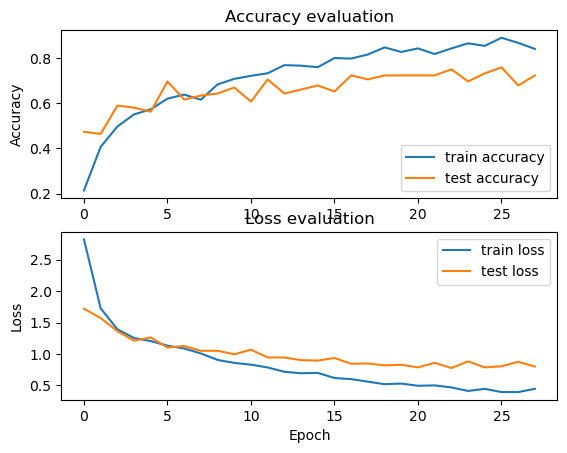

In [9]:
import os
import cv2
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')

combined_images = []
labels = []

pattern = r"(?:bed|fall|pickup|run|sitdown|standup|walk)"

for filename in os.listdir(folder_path):
    if filename.startswith("antenna1_input_") and filename.endswith(".png"):
        experiment_name = filename.split("_")[3]

        img1_path = os.path.join(folder_path, filename)
        img2_path = os.path.join(folder_path, filename.replace("antenna1", "antenna2"))
        img3_path = os.path.join(folder_path, filename.replace("antenna1", "antenna3"))

        img1 = cv2.imread(img1_path, 0) / 255.0
        img2 = cv2.imread(img2_path, 0) / 255.0
        img3 = cv2.imread(img3_path, 0) / 255.0

        merged_img = cv2.merge([img1, img2, img3])

        match = re.search(pattern, filename)
        if match:
            label = match.group()
        else:
            label = "unknown"

        combined_images.append(merged_img)
        labels.append(label)

combined_images = np.array(combined_images)
labels = np.array(labels)

label_dict = {'bed': 0, 'fall': 1, 'pickup': 2, 'run': 3, 'sitdown': 4, 'standup': 5, 'walk': 6}
labels_encoded = np.array([label_dict[label] for label in labels])
labels_one_hot = to_categorical(labels_encoded)

# Shuffle your data before splitting
combined_images, labels_one_hot = shuffle(combined_images, labels_one_hot, random_state=42)

combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)

num_classes = 7
num_epochs = 50
batch_size = 32

# Load the InceptionV3 model without its final fully connected layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=combined_images[0].shape)

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# Add a dropout layer for regularization
x = keras.layers.Dropout(0.6)(x)

# Add a logistic layer with the number of classes we have
predictions = Dense(num_classes, activation='softmax')(x)

# Construct the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Only train the top layers (which were randomly initialized)
# i.e. freeze all InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Update model.fit() to include learning rate scheduler in the callbacks
history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(combined_images_test, labels_test), callbacks=[early_stopping, reduce_lr])

test_loss, test_acc = model.evaluate(combined_images_test, labels_test)
print('Test accuracy:', test_acc)

# Create plots for training and validation accuracy and loss
fig, axs = plt.subplots(2)

# Create accuracy subplot
axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy evaluation")

# Create loss subplot
axs[1].plot(history.history["loss"], label="train loss")
axs[1].plot(history.history["val_loss"], label="test loss")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend(loc="upper right")
axs[1].set_title("Loss evaluation")

plt.show()


# Xception

83683744/83683744 [==============================] - 9s 0us/step
Epoch 1/50
14/14 [==============================] - 64s 4s/step - loss: 1.7262 - accuracy: 0.3124 - val_loss: 1.5377 - val_accuracy: 0.3839 - lr: 0.0010
Epoch 2/50
14/14 [==============================] - 55s 4s/step - loss: 1.3127 - accuracy: 0.5169 - val_loss: 1.2870 - val_accuracy: 0.5536 - lr: 0.0010
Epoch 3/50
14/14 [==============================] - 58s 4s/step - loss: 1.0502 - accuracy: 0.6494 - val_loss: 1.1796 - val_accuracy: 0.6071 - lr: 0.0010
Epoch 4/50
14/14 [==============================] - 55s 4s/step - loss: 0.9461 - accuracy: 0.6360 - val_loss: 1.0811 - val_accuracy: 0.6339 - lr: 0.0010
Epoch 5/50
14/14 [==============================] - 55s 4s/step - loss: 0.8495 - accuracy: 0.7056 - val_loss: 1.0234 - val_accuracy: 0.6429 - lr: 0.0010
Epoch 6/50
14/14 [==============================] - 55s 4s/step - loss: 0.7639 - accuracy: 0.7483 - val_loss: 1.0339 - val_accuracy: 0.6339 - lr: 0.0010
Epoch 7/50
14/14 

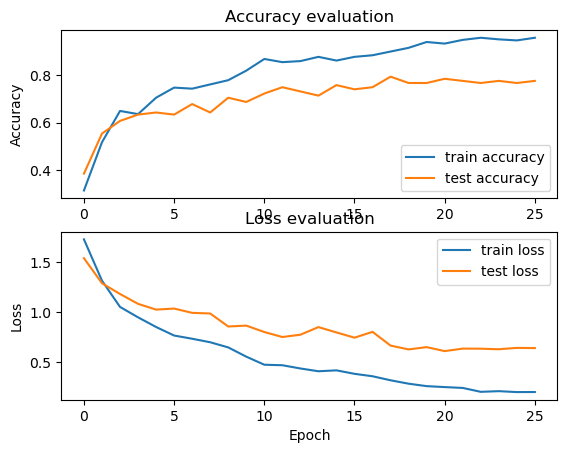

In [2]:
import os
import cv2
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras.applications import Xception  # Import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')

combined_images = []
labels = []

pattern = r"(?:bed|fall|pickup|run|sitdown|standup|walk)"

for filename in os.listdir(folder_path):
    if filename.startswith("antenna1_input_") and filename.endswith(".png"):
        experiment_name = filename.split("_")[3]

        img1_path = os.path.join(folder_path, filename)
        img2_path = os.path.join(folder_path, filename.replace("antenna1", "antenna2"))
        img3_path = os.path.join(folder_path, filename.replace("antenna1", "antenna3"))

        img1 = cv2.imread(img1_path, 0) / 255.0
        img2 = cv2.imread(img2_path, 0) / 255.0
        img3 = cv2.imread(img3_path, 0) / 255.0

        merged_img = cv2.merge([img1, img2, img3])

        match = re.search(pattern, filename)
        if match:
            label = match.group()
        else:
            label = "unknown"

        combined_images.append(merged_img)
        labels.append(label)

combined_images = np.array(combined_images)
labels = np.array(labels)

label_dict = {'bed': 0, 'fall': 1, 'pickup': 2, 'run': 3, 'sitdown': 4, 'standup': 5, 'walk': 6}
labels_encoded = np.array([label_dict[label] for label in labels])
labels_one_hot = to_categorical(labels_encoded)

combined_images, labels_one_hot = shuffle(combined_images, labels_one_hot, random_state=42)

combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)

num_classes = 7
num_epochs = 50
batch_size = 32

base_model = Xception(weights='imagenet', include_top=False, input_shape=combined_images[0].shape)  # Load Xception

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = keras.layers.Dropout(0.6)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(combined_images_test, labels_test), callbacks=[early_stopping, reduce_lr])

test_loss, test_acc = model.evaluate(combined_images_test, labels_test)
print('Test accuracy:', test_acc)

fig, axs = plt.subplots(2)

axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy evaluation")

axs[1].plot(history.history["loss"], label="train loss")
axs[1].plot(history.history["val_loss"], label="test loss")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend(loc="upper right")
axs[1].set_title("Loss evaluation")

plt.show()


# Mobile Net

In [1]:
import os
import cv2
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras.applications import MobileNet  # Import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')

combined_images = []
labels = []

pattern = r"(?:bed|fall|pickup|run|sitdown|standup|walk)"

for filename in os.listdir(folder_path):
    if filename.startswith("antenna1_input_") and filename.endswith(".png"):
        experiment_name = filename.split("_")[3]

        img1_path = os.path.join(folder_path, filename)
        img2_path = os.path.join(folder_path, filename.replace("antenna1", "antenna2"))
        img3_path = os.path.join(folder_path, filename.replace("antenna1", "antenna3"))

        img1 = cv2.imread(img1_path, 0) / 255.0
        img2 = cv2.imread(img2_path, 0) / 255.0
        img3 = cv2.imread(img3_path, 0) / 255.0

        merged_img = cv2.merge([img1, img2, img3])

        match = re.search(pattern, filename)
        if match:
            label = match.group()
        else:
            label = "unknown"

        combined_images.append(merged_img)
        labels.append(label)

combined_images = np.array(combined_images)
labels = np.array(labels)

label_dict = {'bed': 0, 'fall': 1, 'pickup': 2, 'run': 3, 'sitdown': 4, 'standup': 5, 'walk': 6}
labels_encoded = np.array([label_dict[label] for label in labels])
labels_one_hot = to_categorical(labels_encoded)

combined_images, labels_one_hot = shuffle(combined_images, labels_one_hot, random_state=42)

combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)

num_classes = 7
num_epochs = 50
batch_size = 32

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=combined_images[0].shape)  # Load MobileNet

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = keras.layers.Dropout(0.6)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# First train the model with new layers
history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size, validation_data=(combined_images_test, labels_test))

# Unfreeze some layers for fine-tuning
for layer in model.layers[:-10]:
    layer.trainable = False
for layer in model.layers[-10:]:
    layer.trainable = True

model.compile(optimizer=keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(combined_images_test, labels_test), callbacks=[early_stopping, reduce_lr])

test_loss, test_acc = model.evaluate(combined_images_test, labels_test)
print('Test accuracy:', test_acc)

fig, axs = plt.subplots(2)

axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy evaluation")

axs[1].plot(history.history["loss"], label="train loss")
axs[1].plot(history.history["val_loss"], label="test loss")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend(loc="upper right")
axs[1].set_title("Loss evaluation")

plt.show()


Epoch 1/50
14/14 [==============================] - 19s 1s/step - loss: 2.1935 - accuracy: 0.2382 - val_loss: 1.6640 - val_accuracy: 0.4018
Epoch 2/50
14/14 [==============================] - 17s 1s/step - loss: 1.4822 - accuracy: 0.5056 - val_loss: 1.3965 - val_accuracy: 0.3929
Epoch 3/50
14/14 [==============================] - 17s 1s/step - loss: 1.0539 - accuracy: 0.6067 - val_loss: 1.2207 - val_accuracy: 0.5625
Epoch 4/50
14/14 [==============================] - 17s 1s/step - loss: 0.9112 - accuracy: 0.6944 - val_loss: 0.9981 - val_accuracy: 0.6518
Epoch 5/50
14/14 [==============================] - 17s 1s/step - loss: 0.7401 - accuracy: 0.7438 - val_loss: 0.8824 - val_accuracy: 0.7143
Epoch 6/50
14/14 [==============================] - 17s 1s/step - loss: 0.6583 - accuracy: 0.8000 - val_loss: 0.8369 - val_accuracy: 0.7232
Epoch 7/50
14/14 [==============================] - 18s 1s/step - loss: 0.5659 - accuracy: 0.7978 - val_loss: 0.8888 - val_accuracy: 0.6696
Epoch 8/50
14/14 [==

Epoch 1/50
14/14 [==============================] - 7s 420ms/step - loss: 2.0254 - accuracy: 0.3101 - val_loss: 1.2429 - val_accuracy: 0.5089
Epoch 2/50
14/14 [==============================] - 5s 394ms/step - loss: 1.1091 - accuracy: 0.5888 - val_loss: 0.9280 - val_accuracy: 0.6696
Epoch 3/50
14/14 [==============================] - 5s 396ms/step - loss: 0.8382 - accuracy: 0.6966 - val_loss: 0.7571 - val_accuracy: 0.7500
Epoch 4/50
14/14 [==============================] - 5s 395ms/step - loss: 0.6584 - accuracy: 0.7506 - val_loss: 0.7805 - val_accuracy: 0.7143
Epoch 5/50
14/14 [==============================] - 5s 395ms/step - loss: 0.5679 - accuracy: 0.7978 - val_loss: 0.6870 - val_accuracy: 0.7589
Epoch 6/50
14/14 [==============================] - 6s 402ms/step - loss: 0.4610 - accuracy: 0.8404 - val_loss: 0.6453 - val_accuracy: 0.8036
Epoch 7/50
14/14 [==============================] - 6s 401ms/step - loss: 0.4212 - accuracy: 0.8629 - val_loss: 0.6132 - val_accuracy: 0.7411
Epoch 

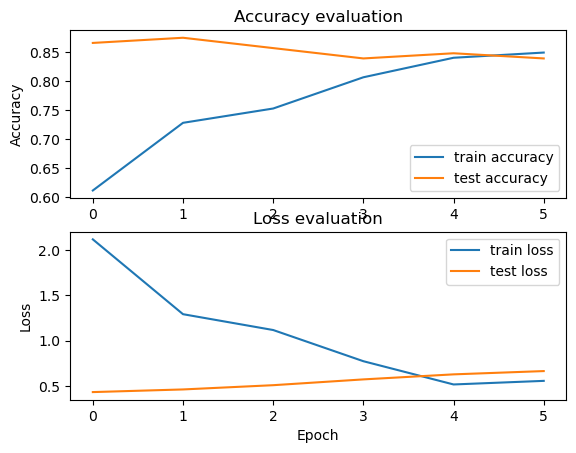

In [1]:
import os
import cv2
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras.applications import MobileNet  # Import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')

combined_images = []
labels = []

pattern = r"(?:bed|fall|pickup|run|sitdown|standup|walk)"

for filename in os.listdir(folder_path):
    if filename.startswith("antenna1_input_") and filename.endswith(".png"):
        experiment_name = filename.split("_")[3]

        img1_path = os.path.join(folder_path, filename)
        img2_path = os.path.join(folder_path, filename.replace("antenna1", "antenna2"))
        img3_path = os.path.join(folder_path, filename.replace("antenna1", "antenna3"))

        img1 = cv2.resize(cv2.imread(img1_path, 0), (224, 224)) / 255.0  # resized image
        img2 = cv2.resize(cv2.imread(img2_path, 0), (224, 224)) / 255.0  # resized image
        img3 = cv2.resize(cv2.imread(img3_path, 0), (224, 224)) / 255.0  # resized image

        merged_img = cv2.merge([img1, img2, img3])

        match = re.search(pattern, filename)
        if match:
            label = match.group()
        else:
            label = "unknown"

        combined_images.append(merged_img)
        labels.append(label)

combined_images = np.array(combined_images)
labels = np.array(labels)

label_dict = {'bed': 0, 'fall': 1, 'pickup': 2, 'run': 3, 'sitdown': 4, 'standup': 5, 'walk': 6}
labels_encoded = np.array([label_dict[label] for label in labels])
labels_one_hot = to_categorical(labels_encoded)

combined_images, labels_one_hot = shuffle(combined_images, labels_one_hot, random_state=42)

combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)

num_classes = 7
num_epochs = 50
batch_size = 32

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=combined_images[0].shape)  # Load MobileNet

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = keras.layers.Dropout(0.6)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# First train the model with new layers
history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size, validation_data=(combined_images_test, labels_test))

# Unfreeze some layers for fine-tuning
for layer in model.layers[:-10]:
    layer.trainable = False
for layer in model.layers[-10:]:
    layer.trainable = True

model.compile(optimizer=keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(combined_images_test, labels_test), callbacks=[early_stopping, reduce_lr])

test_loss, test_acc = model.evaluate(combined_images_test, labels_test)
print('Test accuracy:', test_acc)

fig, axs = plt.subplots(2)

axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy evaluation")

axs[1].plot(history.history["loss"], label="train loss")
axs[1].plot(history.history["val_loss"], label="test loss")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend(loc="upper right")
axs[1].set_title("Loss evaluation")

plt.show()


 switch from Adam optimizer to RMSprop

Epoch 1/50
14/14 [==============================] - 6s 377ms/step - loss: 2.8715 - accuracy: 0.2854 - val_loss: 1.5257 - val_accuracy: 0.4018
Epoch 2/50
14/14 [==============================] - 5s 362ms/step - loss: 1.3505 - accuracy: 0.4921 - val_loss: 1.5596 - val_accuracy: 0.4018
Epoch 3/50
14/14 [==============================] - 5s 358ms/step - loss: 0.9511 - accuracy: 0.6629 - val_loss: 1.4835 - val_accuracy: 0.3929
Epoch 4/50
14/14 [==============================] - 5s 356ms/step - loss: 0.9010 - accuracy: 0.6584 - val_loss: 0.9373 - val_accuracy: 0.5982
Epoch 5/50
14/14 [==============================] - 5s 365ms/step - loss: 0.7502 - accuracy: 0.7281 - val_loss: 0.7918 - val_accuracy: 0.7054
Epoch 6/50
14/14 [==============================] - 5s 357ms/step - loss: 0.6725 - accuracy: 0.7640 - val_loss: 0.7617 - val_accuracy: 0.6518
Epoch 7/50
14/14 [==============================] - 5s 359ms/step - loss: 0.5880 - accuracy: 0.7775 - val_loss: 0.6445 - val_accuracy: 0.7143
Epoch 

Epoch 8/50
14/14 [==============================] - 6s 431ms/step - loss: 0.1707 - accuracy: 0.9348 - val_loss: 0.9579 - val_accuracy: 0.8304 - lr: 1.0000e-05
Epoch 9/50
14/14 [==============================] - 6s 442ms/step - loss: 0.2092 - accuracy: 0.9258 - val_loss: 0.8950 - val_accuracy: 0.8393 - lr: 1.0000e-05
Epoch 10/50
14/14 [==============================] - 6s 438ms/step - loss: 0.1643 - accuracy: 0.9281 - val_loss: 0.8177 - val_accuracy: 0.8571 - lr: 1.0000e-05
Epoch 11/50
14/14 [==============================] - 6s 435ms/step - loss: 0.1335 - accuracy: 0.9506 - val_loss: 0.7547 - val_accuracy: 0.8571 - lr: 1.0000e-05
Epoch 12/50
14/14 [==============================] - 6s 443ms/step - loss: 0.1109 - accuracy: 0.9596 - val_loss: 0.7070 - val_accuracy: 0.8482 - lr: 1.0000e-05
Epoch 13/50
14/14 [==============================] - 6s 455ms/step - loss: 0.0899 - accuracy: 0.9708 - val_loss: 0.7063 - val_accuracy: 0.8393 - lr: 1.0000e-05
Epoch 14/50
14/14 [=======================

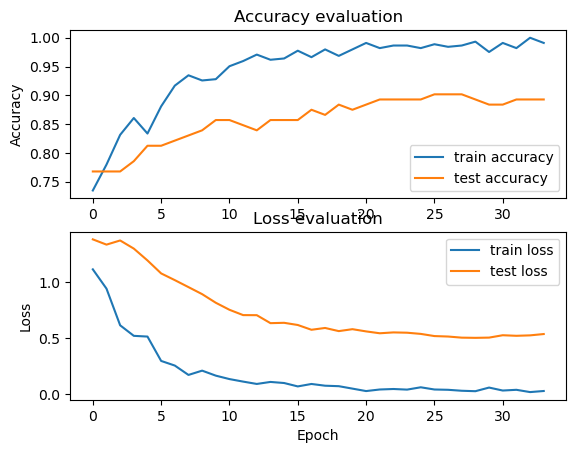

In [2]:
import os
import cv2
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

folder_path = os.path.join(os.getcwd(), 'Dataset', 'image_data_fin')

combined_images = []
labels = []

pattern = r"(?:bed|fall|pickup|run|sitdown|standup|walk)"

for filename in os.listdir(folder_path):
    if filename.startswith("antenna1_input_") and filename.endswith(".png"):
        experiment_name = filename.split("_")[3]

        img1_path = os.path.join(folder_path, filename)
        img2_path = os.path.join(folder_path, filename.replace("antenna1", "antenna2"))
        img3_path = os.path.join(folder_path, filename.replace("antenna1", "antenna3"))

        img1 = cv2.resize(cv2.imread(img1_path, 0), (224, 224)) / 255.0
        img2 = cv2.resize(cv2.imread(img2_path, 0), (224, 224)) / 255.0
        img3 = cv2.resize(cv2.imread(img3_path, 0), (224, 224)) / 255.0

        merged_img = cv2.merge([img1, img2, img3])

        match = re.search(pattern, filename)
        if match:
            label = match.group()
        else:
            label = "unknown"

        combined_images.append(merged_img)
        labels.append(label)

combined_images = np.array(combined_images)
labels = np.array(labels)

label_dict = {'bed': 0, 'fall': 1, 'pickup': 2, 'run': 3, 'sitdown': 4, 'standup': 5, 'walk': 6}
labels_encoded = np.array([label_dict[label] for label in labels])
labels_one_hot = to_categorical(labels_encoded)

combined_images, labels_one_hot = shuffle(combined_images, labels_one_hot, random_state=42)

combined_images_train, combined_images_test, labels_train, labels_test = train_test_split(
    combined_images, labels_one_hot, test_size=0.2, random_state=42)

num_classes = 7
num_epochs = 50
batch_size = 32

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=combined_images[0].shape)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = keras.layers.Dropout(0.6)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size, validation_data=(combined_images_test, labels_test))

for layer in model.layers[:-10]:
    layer.trainable = False
for layer in model.layers[-10:]:
    layer.trainable = True

model.compile(optimizer=keras.optimizers.RMSprop(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(combined_images_train, labels_train, epochs=num_epochs, batch_size=batch_size,
                    validation_data=(combined_images_test, labels_test), callbacks=[early_stopping, reduce_lr])

test_loss, test_acc = model.evaluate(combined_images_test, labels_test)
print('Test accuracy:', test_acc)

fig, axs = plt.subplots(2)

axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy evaluation")

axs[1].plot(history.history["loss"], label="train loss")
axs[1].plot(history.history["val_loss"], label="test loss")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend(loc="upper right")
axs[1].set_title("Loss evaluation")

plt.show()
